In [167]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box, Point

In [266]:
df_geo = pd.read_csv("../data/TwitterPlaceId.csv", sep="\t", index_col="place_id")
df_tweets_geo = pd.read_csv("../data/GeoTweets.csv", sep="\t")
shp = gpd.read_file("../data/GeoShape/cb_2018_us_cbsa_20m/cb_2018_us_cbsa_20m.shp")

In [278]:
def plot_tweet_geo(date: str, shp: gpd.GeoDataFrame, df_tweets_geo: pd.DataFrame, df_geo: pd.DataFrame):
    geo_count = df_tweets_geo[df_tweets_geo["Date"].astype(str)==date]["geo"].value_counts()
    geo = df_geo[df_geo.index.isin(geo_count.index)]
    geo = geo[geo["country_code"]=="US"]
    geo["count"] = geo_count
    geometry = [Point(xy) for xy in zip(geo["longitude"], geo["latitude"])]
    geo = gpd.GeoDataFrame(geo, geometry=geometry, crs="EPSG:4326")
    geo = gpd.sjoin(geo, shp, op="within", how="left")

    gdf = shp.set_index(["NAME"])
    gdf["count"] = geo.groupby(["NAME"]).count()["count"]
    gdf["count"] = gdf["count"].fillna(0)

    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(column="count", cmap="Reds", linewidth=0.1, edgecolor="white", ax=ax)
    
    ax.set_xlim(-130, -60)
    ax.set_ylim(20, 50)
    ax.set_title(f"Density by Tweet on {date}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")


/home/panda/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_8481/588607891.py:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  geo = gpd.sjoin(geo, shp, op="within", how="left")


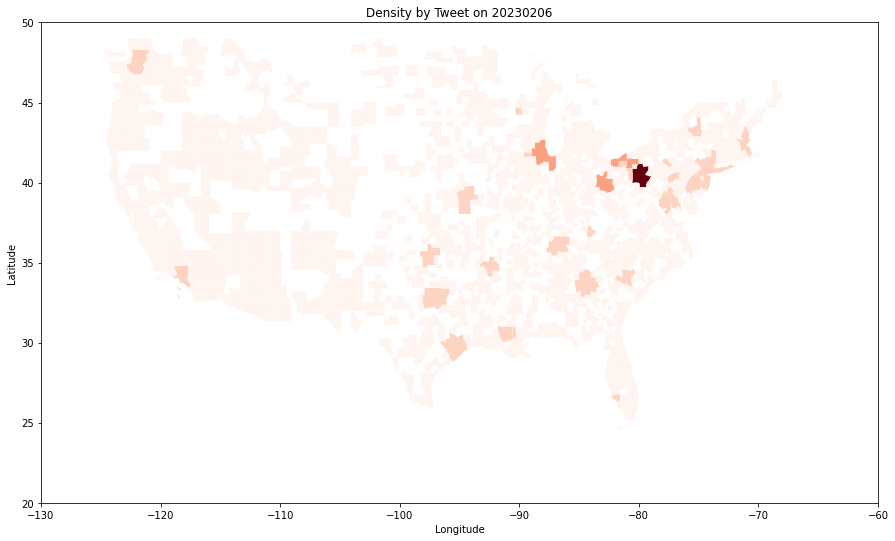

In [283]:
date = "20230206"

plot_tweet_geo(date, shp, df_tweets_geo, df_geo)